In [1]:
"""
In this notebook, we are studying the features.
"""
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

ModuleNotFoundError: No module named 'jupyterthemes'

In [1]:
# importing packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
# print files
DATA_PATH = "../dataset/"

print("File in path: ")
for data in os.listdir(DATA_PATH):
    print(data)

File in path: 
bureau.csv
installments_payments.csv
sample_submission.csv
bureau_balance.csv
application_train.csv
credit_card_balance.csv
previous_application.csv
POS_CASH_balance.csv
application_test.csv
HomeCredit_columns_description.csv


In [87]:
# reading files
df = pd.read_csv(DATA_PATH + "application_train.csv")
# number of columns
print("Size of columns: {}".format(len(df.columns)))

Size of columns: 122


In [4]:
print("Columns: ", df.columns)
print("\nDataframe shape: {} rows and {} columns.".format(df.shape[0], df.shape[1]))

Columns:  Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

Dataframe shape: 307511 rows and 122 columns.


In [203]:
# info about the dataset
# df.nunique()
# df.info(verbose=True)
descript = pd.read_table(DATA_PATH+"HomeCredit_columns_description.csv", encoding='cp1252', index_col=0, sep=',')

## Get categorical features

In [5]:
# get the dummy variables
features_cat = list(df.select_dtypes(include=['object']).columns)
df[features_cat] = df.select_dtypes(include=['object']).apply(lambda x: x.astype('category'))
features_cat.append('TARGET')

In [6]:
# features with missing data
for feature in features_cat:
    if df[feature].isnull().any():
        print("Feature: {}\t{:.2f}%\tmissing data".format(feature, df[feature].isnull().value_counts()[1]/df.shape[0] * 100))
        print(df[feature].value_counts(), '\n')

Feature: NAME_TYPE_SUITE	0.42%	missing data
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64 

Feature: OCCUPATION_TYPE	31.35%	missing data
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64 

Feature: FONDKAPREMONT_MODE	68.39%	missing data
reg oper account         73830
reg oper spec ac

### Plotting features with missing data

In [7]:
# the dataset contain four rows with XNA category
df["CODE_GENDER"].value_counts()

# removing rows
df = df[df["CODE_GENDER"] != 'XNA']

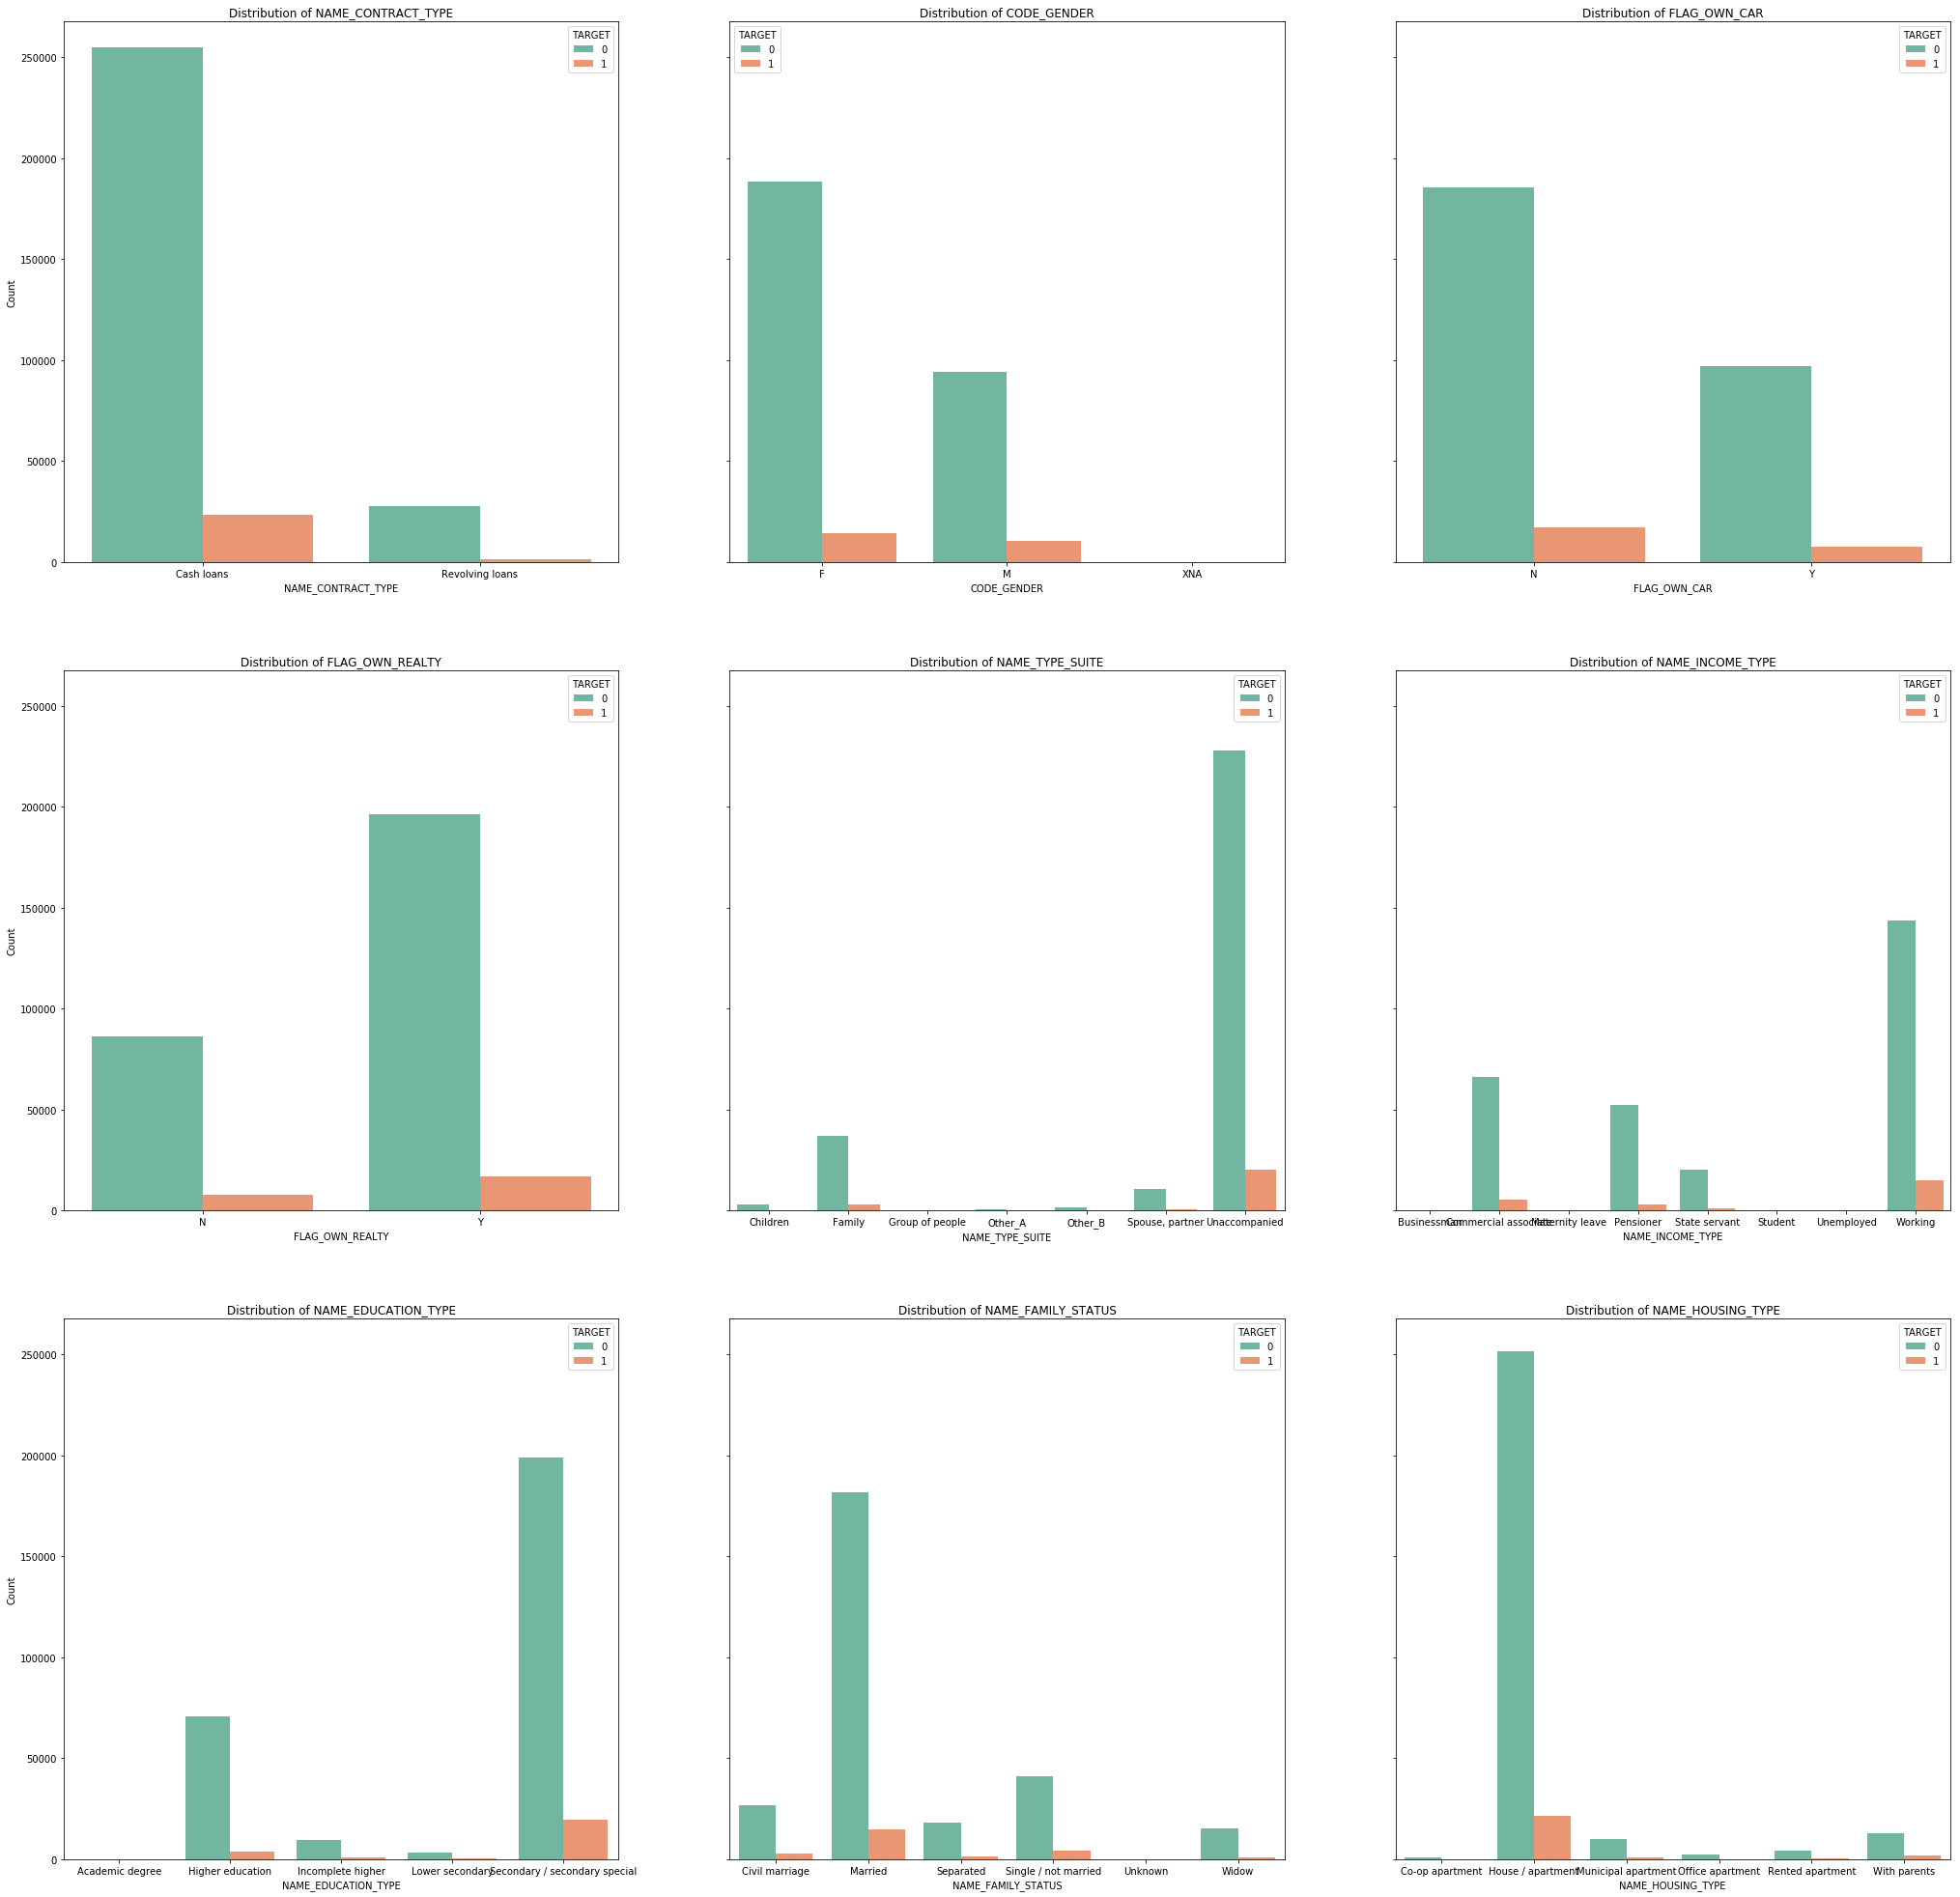

In [8]:
with sns.color_palette("Set2", 5):
    f, ax = plt.subplots(3, 3, figsize=[35,35], sharey=True)
    it = 0
    for i in range(3):
        for j in range(3):
            sns.countplot(x=df[features_cat[it]], hue=df["TARGET"], ax=ax[i, j])
            ax[i, j].set_title("Distribution of {}".format(features_cat[it]))
            if j == 0:
                print("\n")
                ax[i, j].set_ylabel("Count")
            else:
                ax[i, j].set_ylabel("")
            it += 1

### Interpretation:
* Cash_loans are more proprense to TARGET 0 than 1.
* GENDER F is more to target 0 than 1.
* When a customer has no own car, it is more propense to 0 target.
* No children contribuited to target 0

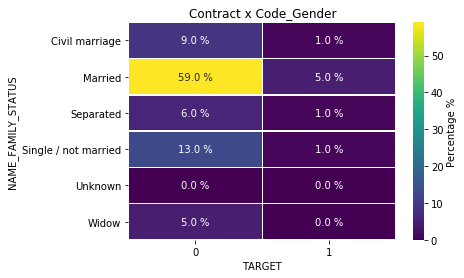

In [9]:
ax = sns.heatmap(pd.crosstab(df['NAME_FAMILY_STATUS'], 
                        df['TARGET'], 
                        normalize=True).mul(100).round(0),linewidths=.5,fmt="g",annot=True, cmap="viridis",cbar_kws={'label': 'Percentage %'})
plt.title("Contract x Code_Gender")
for t in ax.texts: t.set_text(t.get_text() + ".0 %")
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
plt.show()

## Grouping Categorical Data to Predict Missing Data
https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/

In [103]:
grouped = df.groupby(["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "FONDKAPREMONT_MODE", "TARGET"])

In [175]:
#grouped.size().unstack()

In [151]:
for features in features_cat:
        index_null = []
        if df[features].isnull().any():
            index_null = df[df[features].isnull() == True][features].index
            print("{}:\n".format(features))
            for contrat in df["NAME_CONTRACT_TYPE"].unique():
                for sex in df["CODE_GENDER"].unique():
                    for car in df["FLAG_OWN_CAR"].unique():
                        for realty in df["FLAG_OWN_REALTY"].unique():
                            print("{}\t{}\t{}\t{} ->\t{}".format(contrat, sex, car, realty, df[(df["NAME_CONTRACT_TYPE"] == contrat) & (df["CODE_GENDER"] == sex) & (df["FLAG_OWN_CAR"] == car) & (df["FLAG_OWN_REALTY"] == realty)][features].value_counts().sort_values(ascending=False).index[0]))
                            value = df[(df["NAME_CONTRACT_TYPE"] == contrat) & (df["CODE_GENDER"] == sex) & (df["FLAG_OWN_CAR"] == car) & (df["FLAG_OWN_REALTY"] == realty)][features].value_counts().sort_values(ascending=False).index[0]
                            df[features][index_null] = value

In [149]:
for feature in features_cat:
    if df[features].isnull().any():
        for contrat in df["NAME_CONTRACT_TYPE"].unique():
            for sex in df["CODE_GENDER"].unique():
                for car in df["FLAG_OWN_CAR"].unique():
                    for realty in df["FLAG_OWN_REALTY"].unique():
                        # print("{}\t{}\t{}\t{} ->\t{}".format(contrat, sex, car, realty, df[(df["NAME_CONTRACT_TYPE"] == contrat) & (df["CODE_GENDER"] == sex) & (df["FLAG_OWN_CAR"] == car) & (df["FLAG_OWN_REALTY"] == realty)][features].value_counts().sort_values(ascending=False).index[0]))

                        # passing the most commum value into dataframe
                        df_tmp = df[(df["NAME_CONTRACT_TYPE"] == contrat) & (df["CODE_GENDER"] == sex) & (df["FLAG_OWN_CAR"] == car) & (df["FLAG_OWN_REALTY"] == realty)]

                        if df_tmp[feature].value_counts().shape[0] > 0:
                            value = df_tmp[feature].value_counts().sort_values(ascending=False).index[0] # value most commum with feature contrat + sex + car + realty
                            index_null = df_tmp[df_tmp[feature].isnull() == True][feature].index # feature index tha contain missing data
                            #print("{}\t{}\t{}\t{} ->\t{}".format(contrat, sex, car, realty, df_tmp[feature].value_counts().sort_values(ascending=False).index[0]))

                            df[feature][index_null] = value
                            del df_tmp, index_null

In [153]:
# return a list of categorical features
def getNumeric(dataframe):

    # get numeric features
    return [col for col in dataframe.columns if (dataframe[col].dtype == 'int64' or dataframe[col].dtype == 'float')]

feat = getNumeric(df)


SK_ID_CURR                    -0.002111
TARGET                         1.000000
CNT_CHILDREN                   0.019189
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030371
AMT_ANNUITY                   -0.012818
AMT_GOODS_PRICE               -0.039647
REGION_POPULATION_RELATIVE    -0.037225
DAYS_BIRTH                     0.078242
DAYS_EMPLOYED                 -0.044934
DAYS_REGISTRATION              0.041976
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037611
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045984
FLAG_WORK_PHONE                0.028533
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023801
FLAG_EMAIL                    -0.001759
CNT_FAM_MEMBERS                0.009310
REGION_RATING_CLIENT           0.058901
REGION_RATING_CLIENT_W_CITY    0.060895
HOUR_APPR_PROCESS_START       -0.024164
REG_REGION_NOT_LIVE_REGION     0.005575
REG_REGION_NOT_WORK_REGION     0.006941


In [188]:
best_corr_feat = []
it = 0
for fet in feat:
    #cor.append(dict(fet, df[fet].corr(df["TARGET"])))
    if df[fet].corr(df["TARGET"]) > 0.001 or df[fet].corr(df["TARGET"]) < -0.001:
        best_corr_feat.append(fet)
        

In [189]:
for feature in best_corr_feat:
    if df[feature].isnull().any():
        print("Feature: {}\t{:.2f}%\tmissing data".format(feature, df[feature].isnull().value_counts()[1]/df.shape[0] * 100))
        #print(df[feature].value_counts(), '\n')

Feature: AMT_ANNUITY	0.00%	missing data
Feature: AMT_GOODS_PRICE	0.09%	missing data
Feature: OWN_CAR_AGE	65.99%	missing data
Feature: CNT_FAM_MEMBERS	0.00%	missing data
Feature: EXT_SOURCE_1	56.38%	missing data
Feature: EXT_SOURCE_2	0.21%	missing data
Feature: EXT_SOURCE_3	19.83%	missing data
Feature: APARTMENTS_AVG	50.75%	missing data
Feature: BASEMENTAREA_AVG	58.52%	missing data
Feature: YEARS_BEGINEXPLUATATION_AVG	48.78%	missing data
Feature: YEARS_BUILD_AVG	66.50%	missing data
Feature: COMMONAREA_AVG	69.87%	missing data
Feature: ELEVATORS_AVG	53.30%	missing data
Feature: ENTRANCES_AVG	50.35%	missing data
Feature: FLOORSMAX_AVG	49.76%	missing data
Feature: FLOORSMIN_AVG	67.85%	missing data
Feature: LANDAREA_AVG	59.38%	missing data
Feature: LIVINGAPARTMENTS_AVG	68.36%	missing data
Feature: LIVINGAREA_AVG	50.19%	missing data
Feature: NONLIVINGAPARTMENTS_AVG	69.43%	missing data
Feature: NONLIVINGAREA_AVG	55.18%	missing data
Feature: APARTMENTS_MODE	50.75%	missing data
Feature: BASEMENT

In [24]:
df[df['CODE_GENDER'] == 'F'].index

Int64Index([     3,      6,      8,     10,     11,     12,     14,     17,
                18,     19,
            ...
            307500, 307501, 307502, 307503, 307504, 307505, 307507, 307508,
            307509, 307510],
           dtype='int64', length=202445)

In [25]:
df.loc[df[df['CODE_GENDER'] == 'F'].index, "CODE_GENDER"] = "M"

In [96]:
print(df[df["OWN_CAR_AGE"].isnull() == True]["OWN_CAR_AGE"].index)

Int64Index([     0,      1,      3,      4,      5,      8,      9,     10,
                11,     12,
            ...
            307501, 307502, 307503, 307504, 307505, 307506, 307507, 307508,
            307509, 307510],
           dtype='int64', length=202929)


In [97]:
df_1 = df[df["TARGET"] == 0].copy()

In [98]:
df_1[df_1["OWN_CAR_AGE"].isnull() == True]["OWN_CAR_AGE"].index

Int64Index([     1,      3,      4,      5,      8,      9,     10,     11,
                12,     14,
            ...
            307500, 307501, 307502, 307503, 307504, 307505, 307506, 307507,
            307508, 307510],
           dtype='int64', length=185680)

In [95]:
feature = "OWN_CAR_AGE"
df_ = df[df["TARGET"] == 0]
#df[df[df["TARGET"] == 0][feature].isnull() == True][feature].index
#df[df_[feature].isnull() == True].index
df[df["TARGET"] == 0][feature].where(lambda x: x != np.nan).index.shape

(282686,)